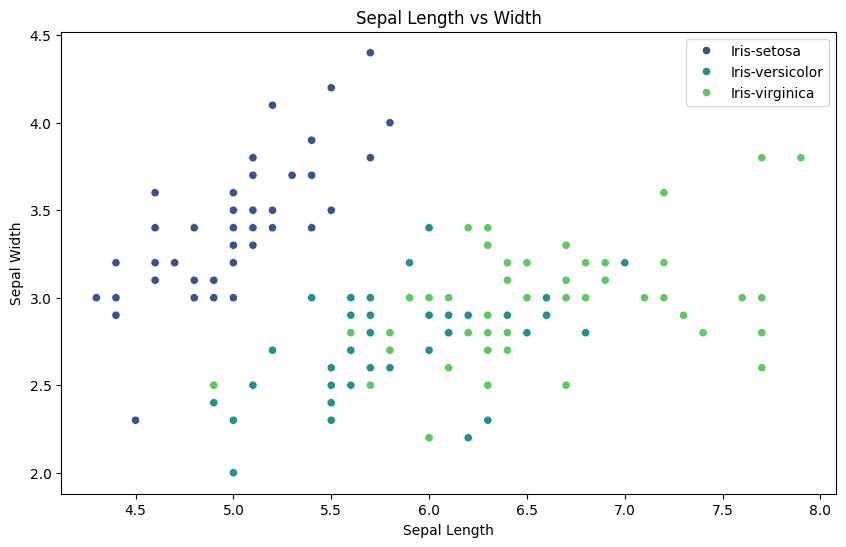

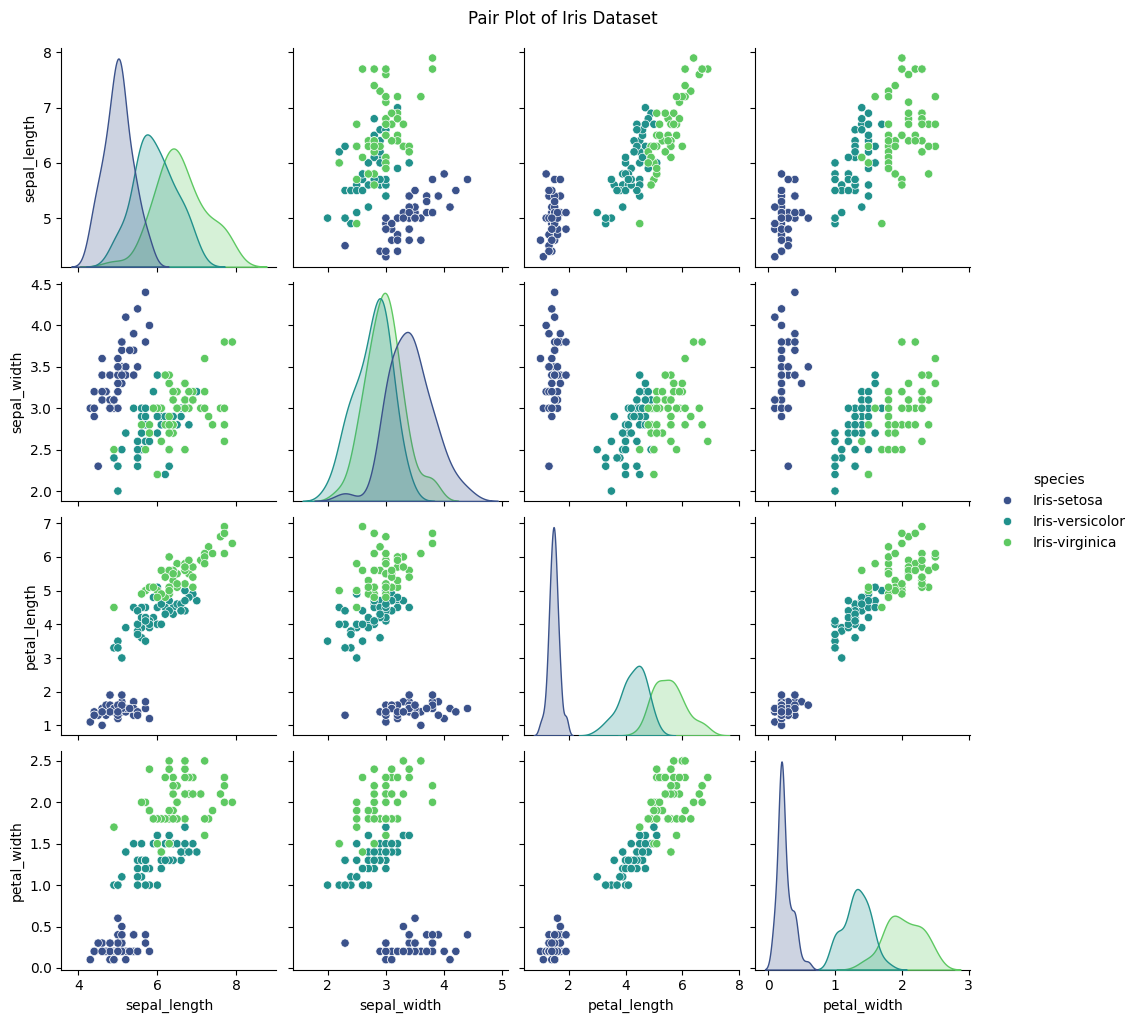

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Visualizng data to understand the patterns

df = pd.read_csv(r'C:\Users\JOHN\Downloads\archive(1)\IRIS.csv')


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', palette='viridis')
plt.title('Sepal Length vs Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

# Pair Plot
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()


#we wanna see any patterns

In [ ]:
#We notice that all species have unique identifiers which will easen the task of the data madel

In [ ]:
#Since the model is predicting the type of flower it is best to use a confusion matrix to check for accuracy and percision

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



df = pd.read_csv(r'C:\Users\JOHN\Downloads\archive(1)\IRIS.csv')

# Separating features and target variable 
X = df.drop(columns='species')
y = df['species']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [35]:
# The model is working perfectly ... and from the first try whaaaaaat? I didnt even have to use SafeLabelEncode ???
# The model detects the petals correctly in all cases :>
# We will check for overfitting 

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv(r'C:\Users\JOHN\Downloads\archive(1)\IRIS.csv')

X = df.drop(columns='species')
y = df['species']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X, y_encoded, cv=kf)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean cross-validation score: 0.9600000000000002


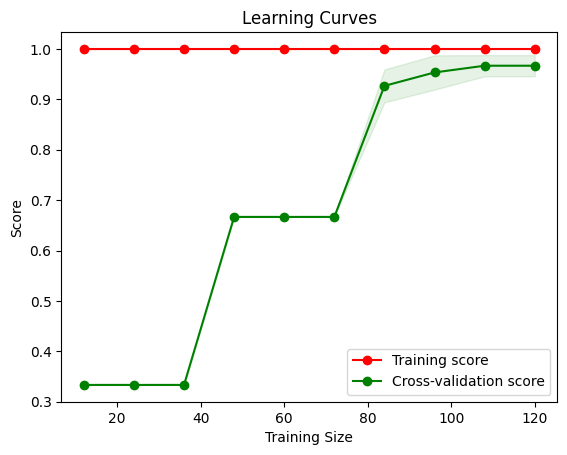

In [52]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(rf_model, X, y_encoded, cv=5, n_jobs=-1, 
                                                       train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='g', alpha=0.1)
plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


In [ ]:
#The graph shows that as the training size  increases the cross-validation score converges on the training score. Suggesting that overfitting is not happening.